In [1]:
# Import necesssary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing the data

In [4]:
airline = pd.read_excel("D:\Data science\Assignments docs\Forecasting\Airlines+Data.xlsx")
airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [5]:
airline.shape

(96, 2)

In [6]:
airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [8]:
# Checking NA values in the dataset

In [9]:
airline.isna().sum()

Month         0
Passengers    0
dtype: int64

#### There are no NA values in the dataset

### Converting 'month' column as index

In [10]:
airline.set_index('Month', inplace=True)

In [11]:
airline.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


## Visualizing the data

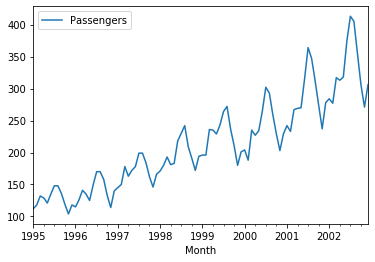

In [12]:
airline.plot()

### Testing for stationarity

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
# Defining a function for ADF test

In [15]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test statistic','p-values','#Lags Used','Number of observations used'] 
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("The data is stationary")
    else:
        print("The data is not stationary")

In [16]:
adfuller_test(airline['Passengers'])

ADF Test statistic : 1.3402479596467112
p-values : 0.9968250481137263
#Lags Used : 12
Number of observations used : 83
The data is not stationary


#### Since the data is not stationary, we have to difference it to make it stationary

In [17]:
airline_diff = airline.diff(periods=1)

In [18]:
airline_diff.head()

,Passengers
Month,
1995-01-01,NaN
1995-02-01,6.0
1995-03-01,14.0
1995-04-01,-3.0
1995-05-01,-8.0


### Again testing using dickey fuller test

In [19]:
adfuller_test(airline_diff['Passengers'].dropna())

ADF Test statistic : -2.150001735920645
p-values : 0.22488942647512905
#Lags Used : 12
Number of observations used : 82
The data is not stationary


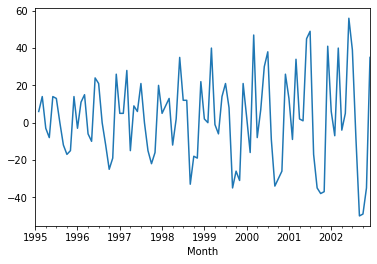

In [20]:
airline_diff['Passengers'].plot()

#### The p-value is still higher and its not stationary after first order differentiation, hence going for 2nd order differentiation

In [21]:
# Another order of differentiation

In [22]:
airline_diff2 = airline_diff.diff(periods=1)

In [23]:
airline_diff2.head()

,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,8.0
1995-04-01,-17.0
1995-05-01,-5.0


### Again testing using dickey fuller test

In [24]:
adfuller_test(airline_diff2['Passengers'].dropna())

ADF Test statistic : -11.547980944840814
p-values : 3.503180236321157e-21
#Lags Used : 11
Number of observations used : 82
The data is stationary


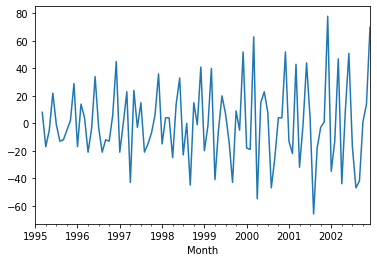

In [25]:
airline_diff2['Passengers'].plot()

#### The data has become stationary after 2nd order of differentiation

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

### Plotting auto correlation and partial correlation plot

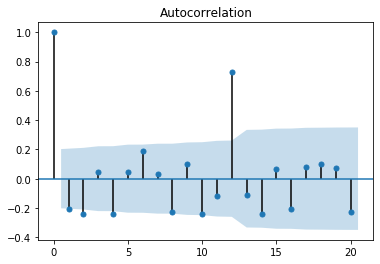

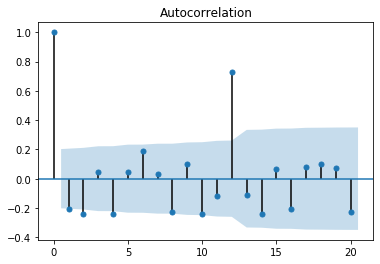

In [27]:
plot_acf(airline_diff2['Passengers'].dropna(),lags=20)

#### The 'q' value for ARIMA model can be taken as 0 referring the above plot

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


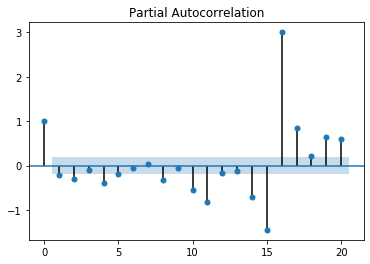

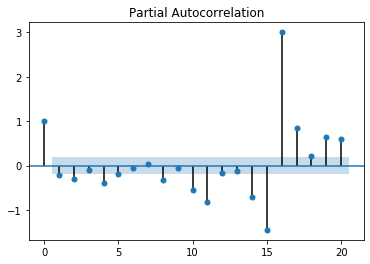

In [28]:
plot_pacf(airline_diff2['Passengers'].dropna(),lags=20)

#### The 'p' value for ARIMA model can be taken as 0 referring the above plot

## Model building

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [30]:
model=ARIMA(airline['Passengers'],order=(0,2,0))
model_fit=model.fit()

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [31]:
model_fit.aic

900.3138224553907

In [32]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D2.Passengers   No. Observations:                   94
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -448.157
Method:                           css   S.D. of innovations             28.465
Date:                Wed, 28 Oct 2020   AIC                            900.314
Time:                        00:17:25   BIC                            905.400
Sample:                    03-01-1995   HQIC                           902.368
                         - 12-01-2002                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3085      2.936      0.105      0.916      -5.446       6.063
==============================================================================
"""

In [33]:
# Checking other values for p,d,q for which the AIC should be the lowest

In [34]:
p=0
d=2
q=0

In [35]:
pdq=[]
aic=[]

In [36]:
for q in range(9):
    try:
        model=ARIMA(airline.Passengers, order=(p,d,q)).fit(disp=0)
        x= model.aic
        x1=p,d,q
        aic.append(x)
        pdq.append(x1)
    except:
        pass

keys=pdq
values=aic
d=dict(zip(keys,values))
print(d)

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS wi

{(0, 2, 0): 900.3138224553907, (0, 2, 1): 869.7586216493797, (0, 2, 2): 861.6151235170738, (0, 2, 3): 860.3326116981874, (0, 2, 4): 850.7712887666399, (0, 2, 5): 841.3076130077463, (0, 2, 6): 843.2831436917743, (0, 2, 7): 837.5386781090747, (0, 2, 8): 832.1670036238166}


#### For order of (0,2,8) AIC value is least at 832.16, hence building model at this order

In [37]:
model=ARIMA(airline['Passengers'],order=(0,2,8))
model_fit=model.fit()

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [38]:
model_fit.aic

832.1670036238166

### Predicting the values for this model

In [39]:
airline.size

96

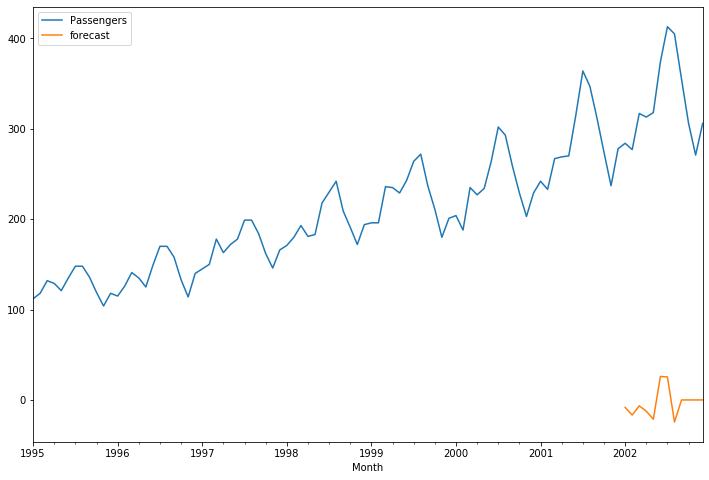

In [40]:
airline['forecast']=model_fit.predict(start=84,end=97,dynamic=True)
airline[['Passengers','forecast']].plot(figsize=(12,8))

### Using the SARIMAX to predict the values for seasonal data

In [41]:
import statsmodels.api as sm

In [42]:
model=sm.tsa.statespace.SARIMAX(airline['Passengers'],order=(0, 2, 8),seasonal_order=(0,2,8,12))
results=model.fit()

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:867: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Like

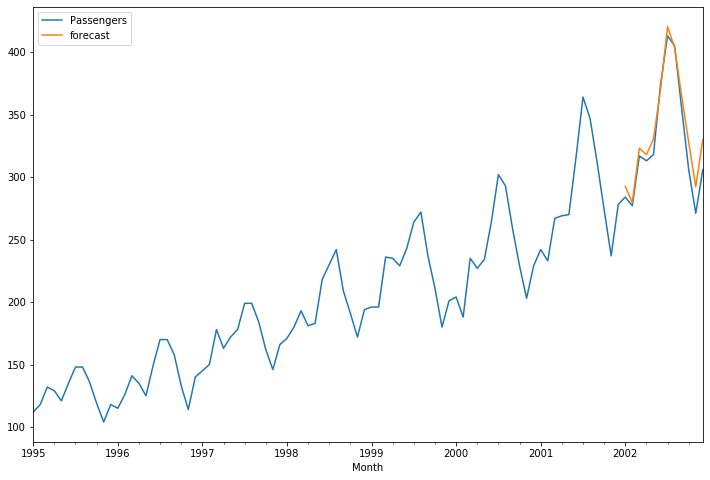

In [43]:
airline['forecast']=results.predict(start=84,end=97,dynamic=True)
airline[['Passengers','forecast']].plot(figsize=(12,8))

#### Forecasted value is very similar to the acutal values, hence the model is good

### Forecasting the future values

In [44]:
from pandas.tseries.offsets import DateOffset
future_dates=[airline.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [45]:
len(future_dates)

24

In [46]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=airline.columns)

In [47]:
future_dates_df

,Passengers,forecast
2003-01-01,NaN,NaN
2003-02-01,NaN,NaN
2003-03-01,NaN,NaN
2003-04-01,NaN,NaN
2003-05-01,NaN,NaN
2003-06-01,NaN,NaN
2003-07-01,NaN,NaN
2003-08-01,NaN,NaN
2003-09-01,NaN,NaN
2003-10-01,NaN,NaN


In [48]:
future_df=pd.concat([airline,future_dates_df], axis=0)

In [49]:
future_df.shape

(119, 2)

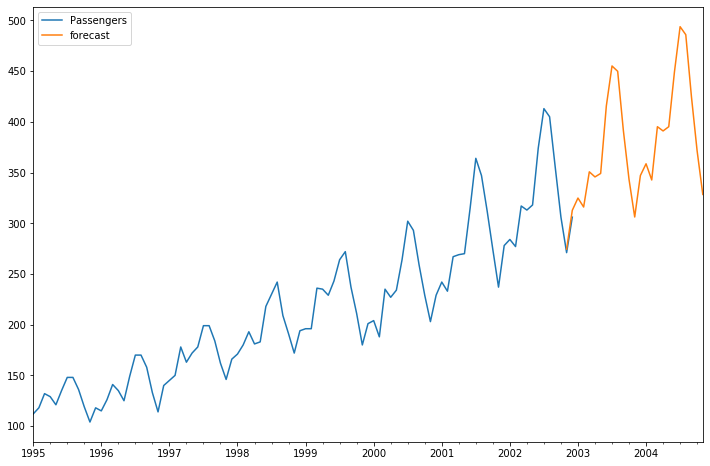

In [50]:
future_df['forecast'] = results.predict(start = 94, end = 119, dynamic= True)  
future_df[['Passengers', 'forecast']].plot(figsize=(12, 8))

#### The forecasted values looks good as it follows both trend and seasonality of original data

In [51]:
# Forecasted values of 2 future years

In [52]:
future_df['forecast'].iloc[96:]

2003-01-01    324.848295
2003-02-01    315.988126
2003-03-01    350.698328
2003-04-01    345.668339
2003-05-01    349.090184
2003-06-01    415.632996
2003-07-01    455.058620
2003-08-01    449.790317
2003-09-01    391.531640
2003-10-01    343.182403
2003-11-01    306.158600
2003-12-01    347.014920
2004-01-01    358.622755
2004-02-01    342.659453
2004-03-01    395.179797
2004-04-01    391.000494
2004-05-01    395.184173
2004-06-01    449.045107
2004-07-01    493.787375
2004-08-01    485.897802
2004-09-01    424.700454
2004-10-01    371.290122
2004-11-01    328.392182
Name: forecast, dtype: float64